Processing Data

In [104]:
import pandas as pd

In [105]:
df = pd.read_csv("callsf0d4f5a.csv")

In [106]:
df.shape

(71810, 7)

In [107]:
df.isnull().sum()

call_id                    0
customer_id                0
agent_id                   0
call_start_datetime        0
agent_assigned_datetime    0
call_end_datetime          0
call_transcript            0
dtype: int64

In [108]:
df.nunique()

call_id                    71810
customer_id                71810
agent_id                     383
call_start_datetime        27399
agent_assigned_datetime    27267
call_end_datetime          27367
call_transcript            71810
dtype: int64

In [109]:
df_customers = pd.read_csv("customers2afd6ea.csv")

In [110]:
df_customers.head()

,customer_id,customer_name,elite_level_code
0,2033123310,Matthew Foster,4.0
1,8186702651,Tammy Walters,NaN
2,2416856629,Jeffery Dixon,NaN
3,1154544516,David Wilkins,2.0
4,5214456437,Elizabeth Daniels,0.0


In [111]:
df_customers.shape

(71810, 3)

In [112]:
df_customers.isnull().sum()

customer_id             0
customer_name           0
elite_level_code    25767
dtype: int64

In [113]:
df_customers.nunique()

customer_id         71810
customer_name       54514
elite_level_code        6
dtype: int64

In [114]:
df_concat = result = pd.concat([df, df_customers['elite_level_code']], axis=1)

In [115]:
df_concat.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,elite_level_code
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...,4.0
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...,NaN
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...,NaN
3,2266439882,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...,2.0
4,1211603231,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...,0.0


In [116]:
df_concat.columns

Index(['call_id', 'customer_id', 'agent_id', 'call_start_datetime',
       'agent_assigned_datetime', 'call_end_datetime', 'call_transcript',
       'elite_level_code'],
      dtype='object')

In [117]:
df_concat['call_start_datetime'] = pd.to_datetime(df_concat['call_start_datetime'])
df_concat['agent_assigned_datetime'] = pd.to_datetime(df_concat['agent_assigned_datetime'])
df_concat['call_end_datetime'] = pd.to_datetime(df_concat['call_end_datetime'])

In [118]:
df_concat['average_speed_to_answer'] = df_concat['agent_assigned_datetime'] - df_concat['call_start_datetime']
df_concat['average_handle_time'] = df_concat['call_end_datetime'] - df_concat['agent_assigned_datetime']

In [119]:
df_concat['elite_level_code'] = df_concat['elite_level_code'].fillna(0.0)

In [120]:
df_concat.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,elite_level_code,average_speed_to_answer,average_handle_time
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,4.0,0 days 00:07:00,0 days 00:31:00
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,0.0,0 days 00:03:00,0 days 00:12:00
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,0.0,0 days 00:08:00,0 days 00:19:00
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,2.0,0 days 00:05:00,0 days 00:07:00
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,0.0,0 days 00:10:00,0 days 00:09:00


In [121]:
grouped_df_elite_level_code = df_concat.groupby('elite_level_code').agg({
    'average_speed_to_answer': 'mean',
    'average_handle_time': 'mean'
}).reset_index()

In [122]:
grouped_df_elite_level_code.head(10)

,elite_level_code,average_speed_to_answer,average_handle_time
0,0.0,0 days 00:07:21.233251979,0 days 00:11:18.143148876
1,1.0,0 days 00:07:16.918580375,0 days 00:11:28.371607515
2,2.0,0 days 00:07:12.772795216,0 days 00:12:06.449925261
3,3.0,0 days 00:07:09.341004184,0 days 00:12:07.510460251
4,4.0,0 days 00:06:53.308235294,0 days 00:13:08.244705882
5,5.0,0 days 00:06:51.410164638,0 days 00:14:56.950608446


In [123]:

agent_chats = df_concat[df_concat['agent_id'] == 102574]

for index, row in agent_chats.iterrows():
    print(f"Call ID: {row['call_id']}\nTranscript: {row['call_transcript']}\n")

Call ID: 6318803032
Transcript: 

Agent: Thank you for calling United Airlines, my name is Sam. How may I help you today?

Customer: Hi, yeah I'm calling because my flight from Chicago to New York tomorrow keeps getting delayed. This is the third time it's been pushed back and now it leaves 6 hours later than originally scheduled. I'm really frustrated at this point.

Agent: I completely understand your frustration sir. Delays and schedule changes are never fun. Let me take a look at your itinerary and see what's going on with that flight. What's the confirmation number?

Customer: It's UA1245. Please tell me there's something you can do, I have meetings in New York I really can't miss. 

Agent: *typing sounds* Okay, I see the issue here. That flight has been experiencing major delays due to weather in Chicago. There was ice on the runways that prevented many flights from taking off on time. I'm really sorry about this. Let me see if there are any options to get you there sooner. Hmm..

In [124]:
grouped_df_agent_id = df_concat.groupby('agent_id').agg({
    'average_handle_time': 'mean',        
    'call_id': 'count'            
}).reset_index()

In [125]:
grouped_df_agent_id.head()

,agent_id,average_handle_time,call_id
0,102574,0 days 01:00:00,2
1,103651,0 days 00:12:27.382550335,298
2,106000,0 days 00:11:29.203539823,113
3,107876,0 days 00:16:30,6
4,112609,0 days 00:14:10.909090909,11


In [126]:
grouped_df_agent_id['average_handle_time'] = grouped_df_agent_id['average_handle_time'].dt.components['hours'].astype(str) + ':' + grouped_df_agent_id['average_handle_time'].dt.components['minutes'].astype(str).str.zfill(2)

In [127]:
grouped_df_agent_id.head()

,agent_id,average_handle_time,call_id
0,102574,1:00,2
1,103651,0:12,298
2,106000,0:11,113
3,107876,0:16,6
4,112609,0:14,11


AHT and AST analysis 

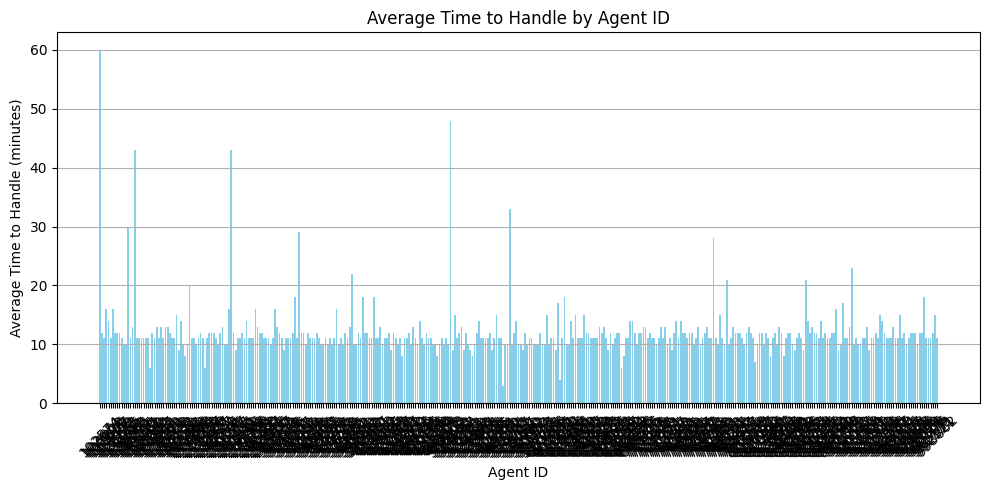

In [129]:
import pandas as pd
import matplotlib.pyplot as plt


grouped_df_agent_id['average_handle_time'] = pd.to_timedelta(grouped_df_agent_id['average_handle_time'] + ':00')  # Add seconds to make it hh:mm:ss


plt.figure(figsize=(10, 5))
plt.bar(grouped_df_agent_id['agent_id'].astype(str), grouped_df_agent_id['average_handle_time'].dt.total_seconds() / 60, color='skyblue')
plt.xlabel('Agent ID')
plt.ylabel('Average Time to Handle (minutes)')  
plt.title('Average Time to Handle by Agent ID')  
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [130]:
from tabulate import tabulate
from termcolor import colored

table = [
    [colored('Count', 'cyan'), grouped_df_agent_id['average_handle_time'].count()],
    [colored('Mean', 'cyan'), grouped_df_agent_id['average_handle_time'].mean()],
    [colored('Std Dev', 'cyan'), grouped_df_agent_id['average_handle_time'].std()],
    [colored('Min', 'green'), grouped_df_agent_id['average_handle_time'].min()],
    [colored('25th Percentile', 'yellow'), grouped_df_agent_id['average_handle_time'].quantile(0.25)],
    [colored('Median (50th Percentile)', 'yellow'), grouped_df_agent_id['average_handle_time'].median()],
    [colored('75th Percentile', 'yellow'), grouped_df_agent_id['average_handle_time'].quantile(0.75)],
    [colored('Max', 'green'), grouped_df_agent_id['average_handle_time'].max()],
]

print(tabulate(table, headers=[colored('Metric', 'red'), colored('Value', 'red')], tablefmt='grid', floatfmt=".2f"))


+--------------------------+---------------------------+
| Metric                   | Value                     |
+==========================+===========================+
| Count                    | 383                       |
+--------------------------+---------------------------+
| Mean                     | 0 days 00:12:06.579634464 |
+--------------------------+---------------------------+
| Std Dev                  | 0 days 00:04:46.525582134 |
+--------------------------+---------------------------+
| Min                      | 0 days 00:03:00           |
+--------------------------+---------------------------+
| 25th Percentile          | 0 days 00:11:00           |
+--------------------------+---------------------------+
| Median (50th Percentile) | 0 days 00:11:00           |
+--------------------------+---------------------------+
| 75th Percentile          | 0 days 00:12:00           |
+--------------------------+---------------------------+
| Max                      | 0 

Metrics of Calls Taken:
Average: 187.4934725848564
Median: 161.0
25th Percentile: 54.5
75th Percentile: 302.5
Total Calls: 71810


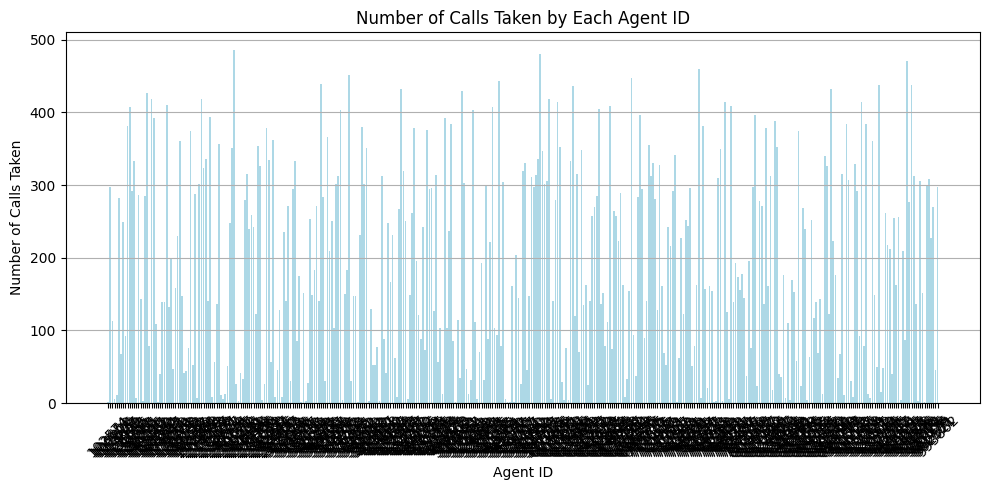

In [171]:
import pandas as pd
import matplotlib.pyplot as plt

metrics = {
    'Average': grouped_df_agent_id['call_id'].mean(),
    'Median': grouped_df_agent_id['call_id'].median(),
    '25th Percentile': grouped_df_agent_id['call_id'].quantile(0.25),
    '75th Percentile': grouped_df_agent_id['call_id'].quantile(0.75),
    'Total Calls': grouped_df_agent_id['call_id'].sum()
}
print("Metrics of Calls Taken:")
for metric, value in metrics.items():
    print(f"{metric}: {value}")

plt.figure(figsize=(10, 5))
plt.bar(grouped_df_agent_id['agent_id'].astype(str), grouped_df_agent_id['call_id'], color='lightblue')
plt.xlabel('Agent ID')
plt.ylabel('Number of Calls Taken')
plt.title('Number of Calls Taken by Each Agent ID')

plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [172]:
import pandas as pd
from tabulate import tabulate
from termcolor import colored

metrics = {
    'Count': grouped_df_agent_id['call_id'].count(),
    'Mean': grouped_df_agent_id['call_id'].mean(),
    'Std Dev': grouped_df_agent_id['call_id'].std(),
    'Min': grouped_df_agent_id['call_id'].min(),
    '25th Percentile': grouped_df_agent_id['call_id'].quantile(0.25),
    'Median (50th Percentile)': grouped_df_agent_id['call_id'].median(),
    '75th Percentile': grouped_df_agent_id['call_id'].quantile(0.75),
    'Max': grouped_df_agent_id['call_id'].max(),
}

table = []
for metric, value in metrics.items():
    color = 'cyan' if metric in ['Count', 'Mean', 'Std Dev'] else 'yellow' if 'Percentile' in metric else 'green'
    table.append([colored(metric, color), value])
print(colored(tabulate(table, headers=['Metric', 'Value'], tablefmt='fancy_grid'), 'cyan'))


╒══════════════════════════╤═════════╕
│ Metric                   │   Value │
╞══════════════════════════╪═════════╡
│ Count                    │ 383     │
├──────────────────────────┼─────────┤
│ Mean                     │ 187.493 │
├──────────────────────────┼─────────┤
│ Std Dev                  │ 137.938 │
├──────────────────────────┼─────────┤
│ Min                      │   1     │
├──────────────────────────┼─────────┤
│ 25th Percentile          │  54.5   │
├──────────────────────────┼─────────┤
│ Median (50th Percentile) │ 161     │
├──────────────────────────┼─────────┤
│ 75th Percentile          │ 302.5   │
├──────────────────────────┼─────────┤
│ Max                      │ 486     │
╘══════════════════════════╧═════════╛


In [132]:
earliest_call = df_concat['call_start_datetime'].min()
latest_call = df_concat['call_start_datetime'].max()

# Display results
print("Earliest call_start_datetime:", earliest_call)
print("Latest call_start_datetime:", latest_call)

Earliest call_start_datetime: 2024-07-31 23:56:00
Latest call_start_datetime: 2024-08-31 23:55:00


In [180]:
grouped_df_agent_id['total_calls'] = grouped_df_agent_id['call_id']

high_aht_threshold = grouped_df_agent_id['average_handle_time'].quantile(0.75)  
low_calls_threshold = grouped_df_agent_id['total_calls'].quantile(0.25)  

filtered_agents = grouped_df_agent_id[
    (grouped_df_agent_id['average_handle_time'] > high_aht_threshold) & 
    (grouped_df_agent_id['total_calls'] < low_calls_threshold)
]

print("Filtered Agents with High AHT and Low Calls:")
print(filtered_agents)

Filtered Agents with High AHT and Low Calls:
     agent_id average_handle_time  call_id  total_calls
0      102574     0 days 01:00:00        2            2
3      107876     0 days 00:16:00        6            6
4      112609     0 days 00:14:00       11           11
13     136065     0 days 00:30:00        7            7
16     140146     0 days 00:43:00        3            3
30     175271     0 days 00:13:00       47           47
35     184151     0 days 00:15:00       42           42
41     201204     0 days 00:20:00        7            7
59     251770     0 days 00:16:00       27           27
60     255256     0 days 00:43:00        3            3
71     281512     0 days 00:16:00        4            4
72     289288     0 days 00:13:00       26           26
80     297033     0 days 00:16:00        8            8
89     335773     0 days 00:18:00        2            2
91     336455     0 days 00:29:00        3            3
108    370723     0 days 00:16:00        4            4
115

In [184]:
if isinstance(high_aht_threshold, pd.Timedelta):
    high_aht_threshold_minutes = high_aht_threshold.total_seconds() / 60  
else:
    high_aht_threshold_minutes = high_aht_threshold  

low_calls_threshold_value = low_calls_threshold 

print(f'Number of agents that need to be revised (High AHT > {high_aht_threshold_minutes:.2f} minutes and Low Calls < {low_calls_threshold_value:.2f}): {len(filtered_agents)}')


Number of agents that need to be revised (High AHT > 12.00 minutes and Low Calls < 54.50): 48


Primary Call Reason Analysis

In [133]:
df_reasons = pd.read_csv("reason18315ff.csv")

In [134]:
df_reasons.head()

,call_id,primary_call_reason
0,4667960400,Voluntary Cancel
1,1122072124,Booking
2,6834291559,IRROPS
3,2266439882,Upgrade
4,1211603231,Seating


In [135]:
df_reasons.shape

(66653, 2)

In [136]:
df_reasons['primary_call_reason'].unique()

array(['Voluntary  Cancel', 'Booking', 'IRROPS', 'Upgrade', 'Seating',
       'Mileage   Plus', 'Checkout', 'Voluntary   Change', 'Post Flight',
       'Check In', 'Other  Topics', 'Communications', 'Schedule Change',
       'Products & Services', 'IRROPS  ', 'Digital   Support',
       'Seating  ', 'Disability', 'Unaccompanied Minor', ' Baggage',
       'Traveler  Updates', 'Communications  ', 'ETC', 'Upgrade  ',
       'Unaccompanied Minor  ', 'Voluntary Change', 'Voluntary Change  ',
       'Checkout  ', 'Mileage Plus', 'Mileage Plus  ', 'Booking  ',
       'Baggage  ', 'Post-Flight', 'Post-Flight  ', 'Schedule Change  ',
       'Baggage', 'Traveler Updates', 'Voluntary Cancel', 'Check-In',
       'Products and Services', 'Check-In  ', 'Other Topics',
       'Other Topics  ', 'ETC  ', 'Disability  ', 'Digital Support',
       'Digital Support  ', 'Voluntary Cancel  ',
       'Products and Services  ', 'Traveler Updates  ',
       'Traveler   Updates', 'Digital  Support', 'Mileage  P

In [137]:
def clean_text(text):
    text = text.replace('-', ' ')
    text = ' '.join(text.split())
    text = text.replace('and', '&')
    return text

df_reasons['primary_call_reason'] = df_reasons['primary_call_reason'].apply(clean_text)

In [138]:
df_reasons['primary_call_reason'].unique()

array(['Voluntary Cancel', 'Booking', 'IRROPS', 'Upgrade', 'Seating',
       'Mileage Plus', 'Checkout', 'Voluntary Change', 'Post Flight',
       'Check In', 'Other Topics', 'Communications', 'Schedule Change',
       'Products & Services', 'Digital Support', 'Disability',
       'Unaccompanied Minor', 'Baggage', 'Traveler Updates', 'ETC'],
      dtype=object)

In [139]:
reason_counts = df_reasons['primary_call_reason'].value_counts()
print(reason_counts)

primary_call_reason
IRROPS                 13311
Voluntary Change       10848
Seating                 6365
Mileage Plus            5851
Post Flight             4330
Communications          3840
Products & Services     3332
Baggage                 2832
Upgrade                 2738
Booking                 2637
Check In                1904
Checkout                1888
Voluntary Cancel        1607
Digital Support         1225
ETC                      952
Traveler Updates         937
Other Topics             818
Schedule Change          731
Disability               403
Unaccompanied Minor      104
Name: count, dtype: int64


In [140]:
merged_df = pd.merge(df_concat, df_reasons, on='call_id', how='inner') 

In [141]:
merged_df.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,elite_level_code,average_speed_to_answer,average_handle_time,primary_call_reason
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,4.0,0 days 00:07:00,0 days 00:31:00,Voluntary Cancel
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,0.0,0 days 00:03:00,0 days 00:12:00,Booking
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,0.0,0 days 00:08:00,0 days 00:19:00,IRROPS
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,2.0,0 days 00:05:00,0 days 00:07:00,Upgrade
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,0.0,0 days 00:10:00,0 days 00:09:00,Seating


In [142]:
merged_df.shape

(66653, 11)

In [143]:
agent_chats = merged_df[merged_df['agent_id'] == 102574]

for index, row in agent_chats.iterrows():
    print(f"Call ID: {row['call_id']}\nTranscript: {row['call_transcript']}\n{row['primary_call_reason']}")

Call ID: 6318803032
Transcript: 

Agent: Thank you for calling United Airlines, my name is Sam. How may I help you today?

Customer: Hi, yeah I'm calling because my flight from Chicago to New York tomorrow keeps getting delayed. This is the third time it's been pushed back and now it leaves 6 hours later than originally scheduled. I'm really frustrated at this point.

Agent: I completely understand your frustration sir. Delays and schedule changes are never fun. Let me take a look at your itinerary and see what's going on with that flight. What's the confirmation number?

Customer: It's UA1245. Please tell me there's something you can do, I have meetings in New York I really can't miss. 

Agent: *typing sounds* Okay, I see the issue here. That flight has been experiencing major delays due to weather in Chicago. There was ice on the runways that prevented many flights from taking off on time. I'm really sorry about this. Let me see if there are any options to get you there sooner. Hmm..

In [144]:
merged_df.columns

Index(['call_id', 'customer_id', 'agent_id', 'call_start_datetime',
       'agent_assigned_datetime', 'call_end_datetime', 'call_transcript',
       'elite_level_code', 'average_speed_to_answer', 'average_handle_time',
       'primary_call_reason'],
      dtype='object')

In [145]:
reason_counts = merged_df['primary_call_reason'].value_counts()
most_frequent_reason = reason_counts.idxmax()
least_frequent_reason = reason_counts.idxmin()

most_frequent_df = merged_df[merged_df['primary_call_reason'] == most_frequent_reason]
least_frequent_df = merged_df[merged_df['primary_call_reason'] == least_frequent_reason]

mean_average_handle_time_most = most_frequent_df['average_handle_time'].mean()
mean_average_handle_time_least = least_frequent_df['average_handle_time'].mean()

percentage_diff = ((mean_average_handle_time_most - mean_average_handle_time_least) / mean_average_handle_time_least) * 100

print(mean_average_handle_time_most)
print(mean_average_handle_time_least)
print(f"Most frequent reason: {most_frequent_reason}")
print(f"Least frequent reason: {least_frequent_reason}")
print(f"Percentage difference in average_handle_time: {percentage_diff:.2f}%")

0 days 00:13:05.116069416
0 days 00:08:39.230769230
Most frequent reason: IRROPS
Least frequent reason: Unaccompanied Minor
Percentage difference in average_handle_time: 51.21%


In [146]:
mean_average_handle_time = merged_df.groupby('primary_call_reason')['average_handle_time'].mean().sort_values()

In [164]:
mean_average_handle_time

primary_call_reason
Disability            0 days 00:04:52.109181141
Baggage               0 days 00:05:33.644067796
Other Topics          0 days 00:05:50.097799511
Digital Support       0 days 00:06:12.293877551
Traveler Updates      0 days 00:06:33.233724653
Booking               0 days 00:07:07.736063708
Seating               0 days 00:07:54.994501178
Schedule Change       0 days 00:08:10.013679890
Unaccompanied Minor   0 days 00:08:39.230769230
Check In              0 days 00:09:34.128151260
Upgrade               0 days 00:10:32.344777209
Voluntary Change      0 days 00:10:39.153761061
Voluntary Cancel      0 days 00:12:01.866832607
Products & Services   0 days 00:12:26.560624249
IRROPS                0 days 00:13:05.116069416
Communications           0 days 00:13:46.718750
Post Flight           0 days 00:15:32.896073903
ETC                   0 days 00:16:02.899159663
Mileage Plus          0 days 00:16:35.573406255
Checkout              0 days 00:16:56.853813559
Name: average_handle

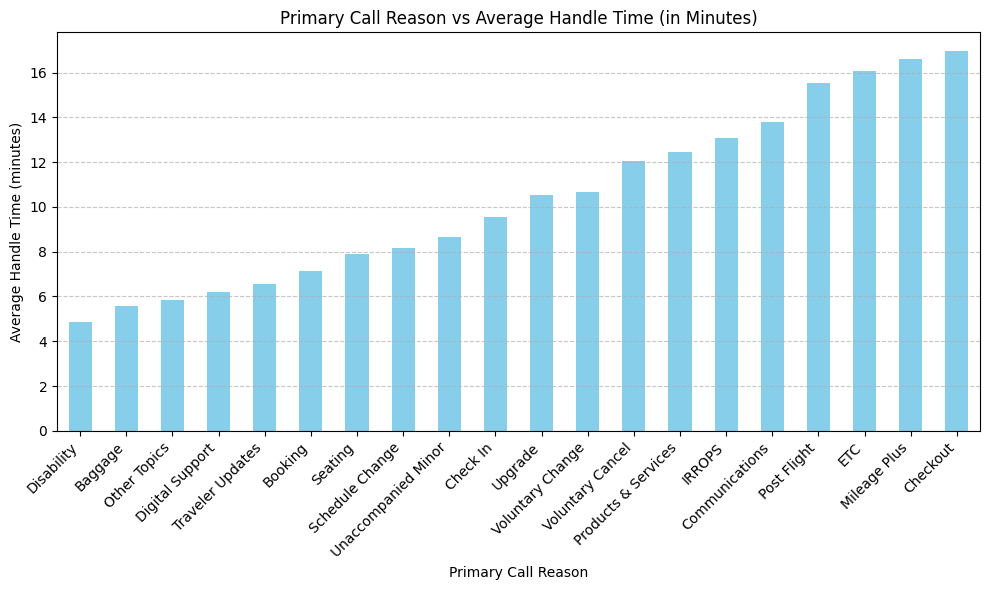

In [166]:
import matplotlib.pyplot as plt

mean_average_handle_time_minutes = mean_average_handle_time.dt.total_seconds() / 60

plt.figure(figsize=(10, 6))
mean_average_handle_time_minutes.plot(kind='bar', color='skyblue')
plt.title('Primary Call Reason vs Average Handle Time (in Minutes)')
plt.xlabel('Primary Call Reason')
plt.ylabel('Average Handle Time (minutes)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Sentiment Analysis

In [148]:
df_sentiment = pd.read_csv("sentiment_statisticscc1e57a.csv")

In [149]:
merged_sentiment_df = pd.merge(df_concat, df_sentiment, on='call_id', how='inner') 

In [150]:
merged_sentiment_df.columns

Index(['call_id', 'customer_id', 'agent_id_x', 'call_start_datetime',
       'agent_assigned_datetime', 'call_end_datetime', 'call_transcript',
       'elite_level_code', 'average_speed_to_answer', 'average_handle_time',
       'agent_id_y', 'agent_tone', 'customer_tone', 'average_sentiment',
       'silence_percent_average'],
      dtype='object')

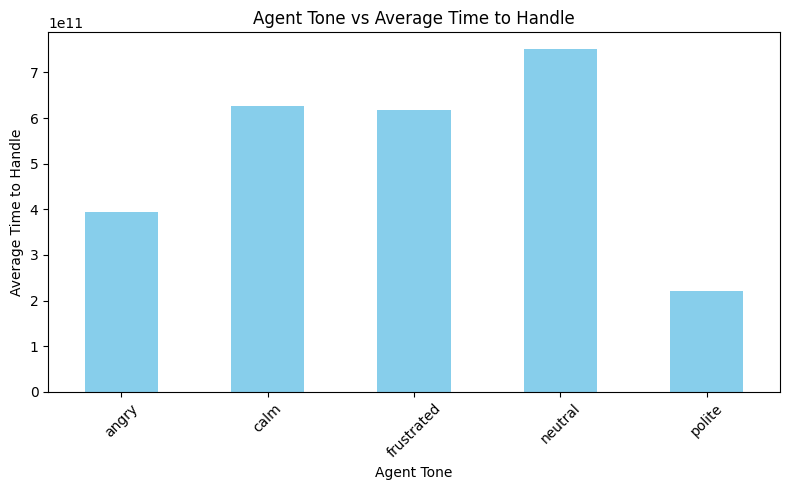

In [151]:
import matplotlib.pyplot as plt

agent_tone_avg_average_handle_time = merged_sentiment_df.groupby('agent_tone')['average_handle_time'].mean()

plt.figure(figsize=(8, 5))
agent_tone_avg_average_handle_time.plot(kind='bar', color='skyblue')
plt.title('Agent Tone vs Average Time to Handle')
plt.xlabel('Agent Tone')
plt.ylabel('Average Time to Handle')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


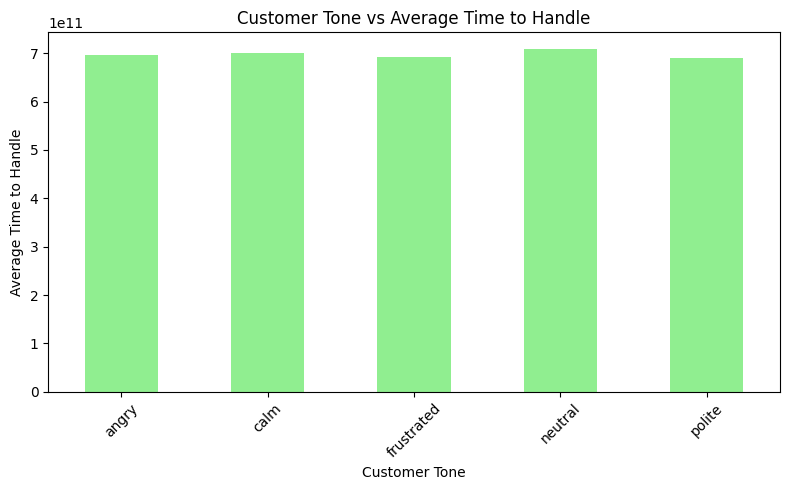

In [152]:
customer_tone_avg_average_handle_time = merged_sentiment_df.groupby('customer_tone')['average_handle_time'].mean()

plt.figure(figsize=(8, 5))
customer_tone_avg_average_handle_time.plot(kind='bar', color='lightgreen')
plt.title('Customer Tone vs Average Time to Handle')
plt.xlabel('Customer Tone')
plt.ylabel('Average Time to Handle')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


-0.08
0.01


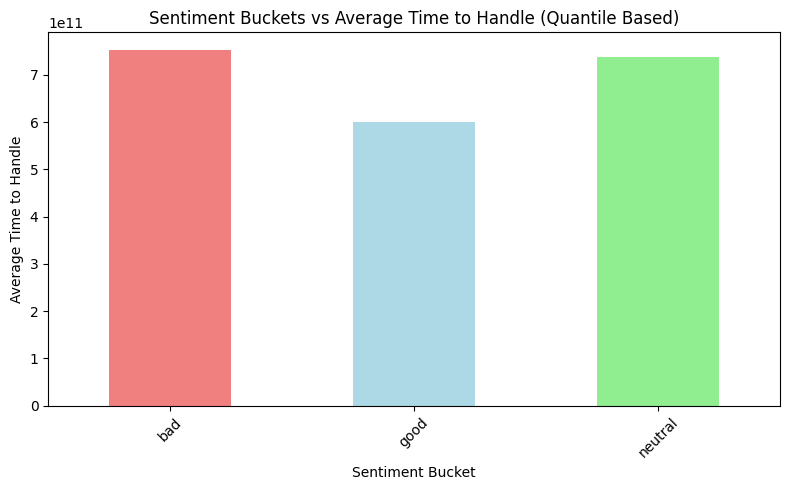

In [167]:
import matplotlib.pyplot as plt
import pandas as pd

quantiles = merged_sentiment_df['average_sentiment'].quantile([0.33, 0.66])
print(quantiles[0.33])
print(quantiles[0.66])

def classify_sentiment(value):
    if value <= quantiles[0.33]:
        return 'bad'
    elif value <= quantiles[0.66]:
        return 'neutral'
    else:
        return 'good'

merged_sentiment_df['sentiment_bucket'] = merged_sentiment_df['average_sentiment'].apply(classify_sentiment)
sentiment_bucket_avg_average_handle_time = merged_sentiment_df.groupby('sentiment_bucket')['average_handle_time'].mean()
plt.figure(figsize=(8, 5))
sentiment_bucket_avg_average_handle_time.plot(kind='bar', color=['lightcoral', 'lightblue', 'lightgreen'])
plt.title('Sentiment Buckets vs Average Time to Handle (Quantile Based)')
plt.xlabel('Sentiment Bucket')
plt.ylabel('Average Time to Handle')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [156]:
total_merge = pd.merge(merged_df, df_sentiment, on='call_id', how='inner') 

In [157]:
total_merge.shape

(66653, 16)

In [158]:
total_merge.columns

Index(['call_id', 'customer_id', 'agent_id_x', 'call_start_datetime',
       'agent_assigned_datetime', 'call_end_datetime', 'call_transcript',
       'elite_level_code', 'average_speed_to_answer', 'average_handle_time',
       'primary_call_reason', 'agent_id_y', 'agent_tone', 'customer_tone',
       'average_sentiment', 'silence_percent_average'],
      dtype='object')

C:\Users\shaun\AppData\Local\Temp\ipykernel_13088\1021616924.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(grouped_data['call_time_category'], rotation=45)


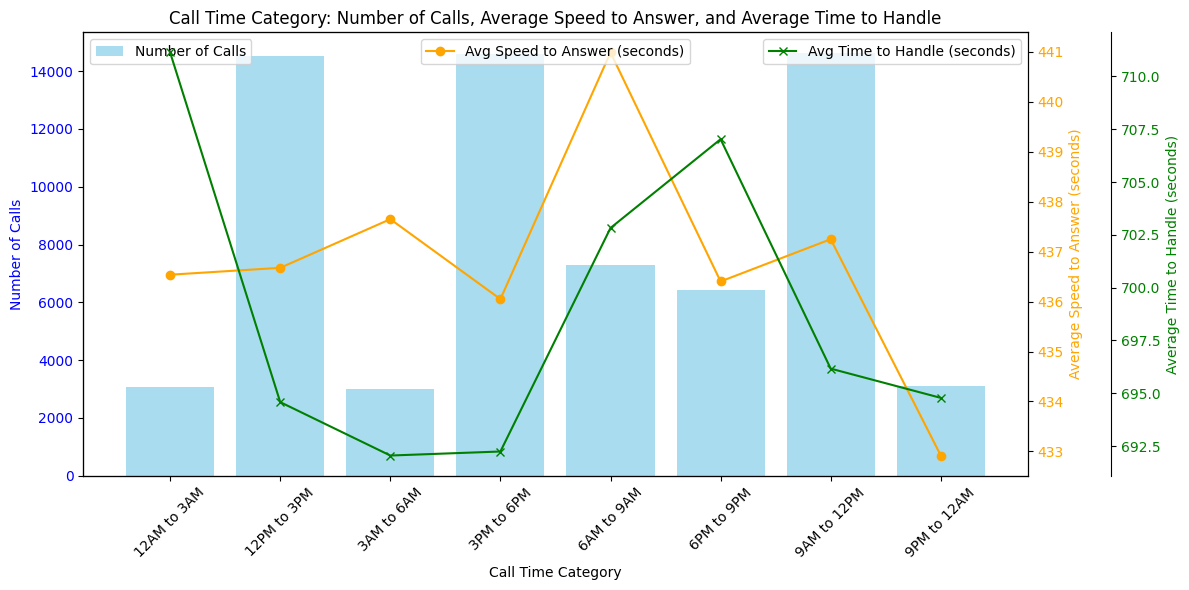

In [168]:
import pandas as pd
import matplotlib.pyplot as plt

total_merge['call_start_datetime'] = pd.to_datetime(total_merge['call_start_datetime'])

def categorize_time_of_day_3hr(hour):
    if 0 <= hour < 3:
        return '12AM to 3AM'
    elif 3 <= hour < 6:
        return '3AM to 6AM'
    elif 6 <= hour < 9:
        return '6AM to 9AM'
    elif 9 <= hour < 12:
        return '9AM to 12PM'
    elif 12 <= hour < 15:
        return '12PM to 3PM'
    elif 15 <= hour < 18:
        return '3PM to 6PM'
    elif 18 <= hour < 21:
        return '6PM to 9PM'
    else:
        return '9PM to 12AM'

total_merge['call_time_category'] = total_merge['call_start_datetime'].dt.hour.apply(categorize_time_of_day_3hr)

grouped_data = total_merge.groupby('call_time_category').agg(
    avg_speed_to_answer=('average_speed_to_answer', 'mean'),
    avg_time_to_handle=('average_handle_time', 'mean'),
    call_count=('call_id', 'count')  # Count of calls
).reset_index()

grouped_data['avg_speed_to_answer'] = grouped_data['avg_speed_to_answer'].dt.total_seconds()
grouped_data['avg_time_to_handle'] = grouped_data['avg_time_to_handle'].dt.total_seconds()

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(grouped_data['call_time_category'], grouped_data['call_count'], color='skyblue', alpha=0.7, label='Number of Calls')
ax1.set_xlabel('Call Time Category')
ax1.set_ylabel('Number of Calls', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(grouped_data['call_time_category'], rotation=45)

ax2 = ax1.twinx()
ax2.plot(grouped_data['call_time_category'], grouped_data['avg_speed_to_answer'], color='orange', marker='o', label='Avg Speed to Answer (seconds)')
ax2.set_ylabel('Average Speed to Answer (seconds)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Move the third y-axis outward
ax3.plot(grouped_data['call_time_category'], grouped_data['avg_time_to_handle'], color='green', marker='x', label='Avg Time to Handle (seconds)')
ax3.set_ylabel('Average Time to Handle (seconds)', color='green')
ax3.tick_params(axis='y', labelcolor='green')

plt.title('Call Time Category: Number of Calls, Average Speed to Answer, and Average Time to Handle')
fig.tight_layout() 
ax1.legend(loc='upper left')
ax2.legend(loc='upper center')
ax3.legend(loc='upper right')

plt.show()


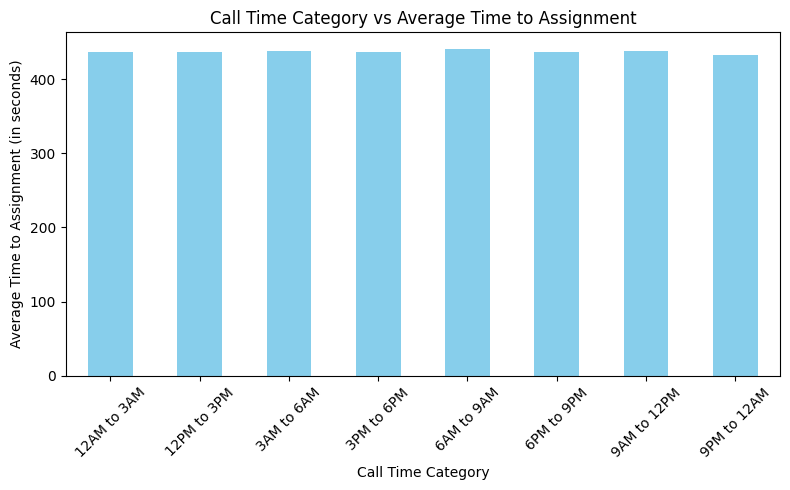

In [160]:
import matplotlib.pyplot as plt

avg_average_speed_to_answer_by_category = total_merge.groupby('call_time_category')['average_speed_to_answer'].mean()

avg_average_speed_to_answer_in_seconds = avg_average_speed_to_answer_by_category.dt.total_seconds()

plt.figure(figsize=(8, 5))
avg_average_speed_to_answer_in_seconds.plot(kind='bar', color='skyblue')
plt.title('Call Time Category vs Average Time to Assignment')
plt.xlabel('Call Time Category')
plt.ylabel('Average Time to Assignment (in seconds)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [161]:
avg_average_speed_to_answer_by_category.head()

call_time_category
12AM to 3AM   0 days 00:07:16.537585421
12PM to 3PM   0 days 00:07:16.675378266
3AM to 6AM    0 days 00:07:17.649402390
3PM to 6PM    0 days 00:07:16.049094898
6AM to 9AM    0 days 00:07:20.986031224
Name: average_speed_to_answer, dtype: timedelta64[ns]

In [162]:
total_merge.head(10)

,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,elite_level_code,average_speed_to_answer,average_handle_time,primary_call_reason,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average,call_time_category
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,4.0,0 days 00:07:00,0 days 00:31:00,Voluntary Cancel,963118,neutral,angry,-0.04,0.39,9PM to 12AM
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,0.0,0 days 00:03:00,0 days 00:12:00,Booking,519057,calm,neutral,0.02,0.35,12AM to 3AM
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,0.0,0 days 00:08:00,0 days 00:19:00,IRROPS,158319,neutral,polite,-0.13,0.32,9PM to 12AM
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,2.0,0 days 00:05:00,0 days 00:07:00,Upgrade,488324,neutral,frustrated,-0.20,0.20,12AM to 3AM
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,0.0,0 days 00:10:00,0 days 00:09:00,Seating,721730,neutral,polite,-0.05,0.35,12AM to 3AM
5,5297766997,5590154991,817160,2024-08-01 00:11:00,2024-08-01 00:16:00,2024-08-01 00:40:00,\n\nAgent: Thank you for calling United Airlin...,5.0,0 days 00:05:00,0 days 00:24:00,Mileage Plus,817160,calm,calm,0.10,0.11,12AM to 3AM
6,324593040,6774865122,519057,2024-08-01 00:08:00,2024-08-01 00:21:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,0.0,0 days 00:13:00,0 days 00:13:00,Checkout,519057,neutral,frustrated,0.00,0.25,12AM to 3AM
7,8902603117,7974326984,488324,2024-08-01 00:13:00,2024-08-01 00:21:00,2024-08-01 00:29:00,\n\nAgent: Thank you for calling United Airlin...,2.0,0 days 00:08:00,0 days 00:08:00,Mileage Plus,488324,calm,angry,0.11,0.35,12AM to 3AM
8,7222687732,8023417234,957331,2024-08-01 00:14:00,2024-08-01 00:22:00,2024-08-01 00:35:00,\n\nAgent: Thank you for calling United Airlin...,1.0,0 days 00:08:00,0 days 00:13:00,Mileage Plus,957331,calm,neutral,0.06,0.54,12AM to 3AM
9,4113684017,1528835057,158319,2024-08-01 00:20:00,2024-08-01 00:28:00,2024-08-01 00:37:00,\n\nAgent: Thank you for calling United Airlin...,0.0,0 days 00:08:00,0 days 00:09:00,IRROPS,158319,neutral,angry,-0.19,0.29,12AM to 3AM
